**Import** the *imdb_cleaned.csv* dataset into a Pandas dataframe.

In [3]:
import pandas as pd
df = pd.read_csv('imdb_cleaned.csv')
df

,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,...,False,False,False,False,False,False,False,False,False,False
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,...,False,False,False,False,False,False,False,False,False,False
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,...,False,False,False,False,False,False,False,False,False,False
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,...,False,False,False,False,False,False,False,False,False,False
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,...,True,False,False,False,False,True,False,False,False,False
996,996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,...,False,False,False,False,False,False,False,False,False,False
997,997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,...,True,True,False,True,False,False,False,False,False,False
998,998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,...,False,False,False,False,False,False,False,False,False,False


In a prior checkpoint, we analyzed the relationship between Year and Rating and Genre and Rating. Now we would like to visualize those relationships and add the ANOVA results text to the images. Begin by **creating a bar chart** visualizing *Year as the feature* and *Rating as the label*. Use the **barplot()** object of the seaborn package for this.

**ANSWER: Can you tell any differences in rating between any particular years? How?**

C:\Users\Kotori\AppData\Local\Temp\ipykernel_2392\294305260.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Rating', data=average_rating_by_year, palette='viridis')


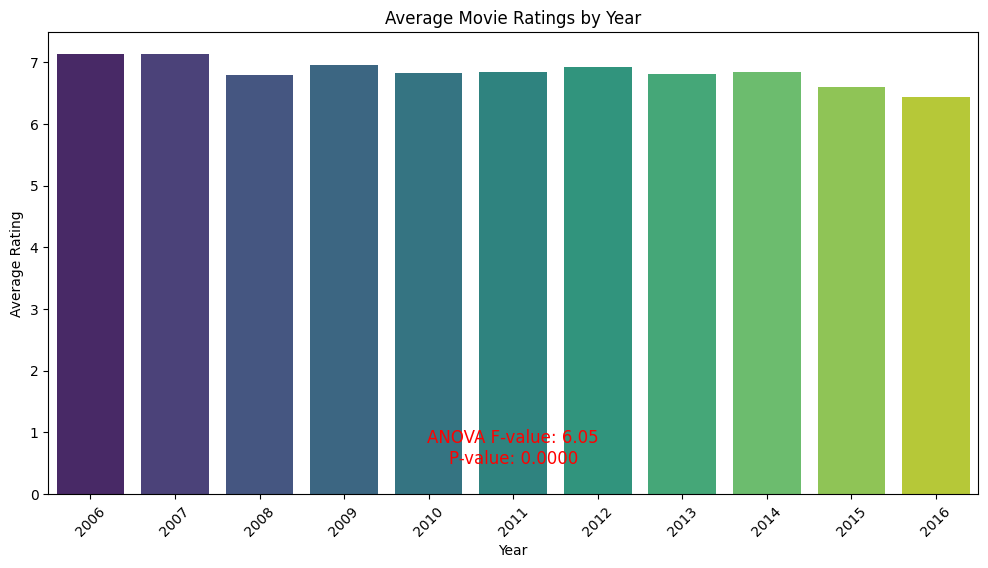

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rating', data=average_rating_by_year, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Movie Ratings by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
ratings_by_year = [df[df['Year'] == year]['Rating'] for year in df['Year'].unique()]
anova_result = f_oneway(*ratings_by_year)

# Add ANOVA results to the plot
plt.text(0.5, 0.1, f"ANOVA F-value: {anova_result.statistic:.2f}\nP-value: {anova_result.pvalue:.4f}",
         ha='center', va='center', transform=plt.gca().transAxes, color="red", fontsize=12)
plt.show()


**ANSWER:** Yes, there is a noticeable decline in ratings over the years. The bar chart shows that average ratings are generally higher in earlier years and tend to decrease gradually in more recent years. This trend suggests that movies released in earlier years received relatively better ratings compared to those in later years. The ANOVA results confirm that this difference is statistically significant, indicating that the year of release does have an impact on the average movie rating.

Next, **modify the barplot** from the prior problem to reflect the average ratings for **Animated movies compared to non-Animated movies**.

**ANSWER: Does there seem to be a difference in rating between Animated vs. Non-Animated movies? How can you tell?**

Use the code below to create a **boxen** (box and whisker) plot version of the last chart. **ANSWER: Interpret what this communicates to you as the analyst**

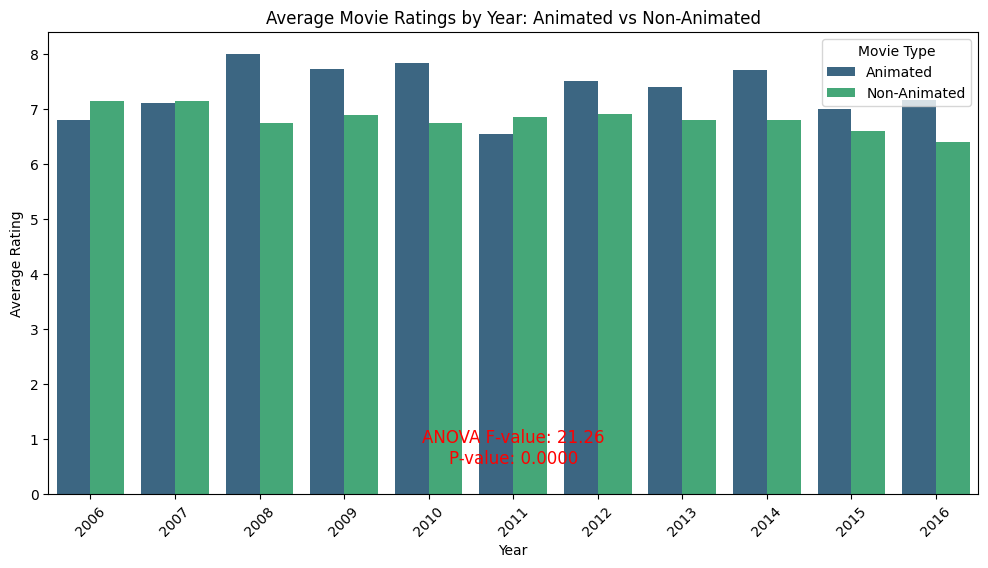

In [5]:
# Add a column to identify if a movie is Animated or Non-Animated
df['Animation'] = df['Genre'].str.contains('Animation').replace({True: 'Animated', False: 'Non-Animated'})

# Group by Animation type and Year, then calculate average rating for each group
average_rating_by_year_and_animation = df.groupby(['Year', 'Animation'])['Rating'].mean().reset_index()

# Create the modified bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rating', hue='Animation', data=average_rating_by_year_and_animation, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Movie Ratings by Year: Animated vs Non-Animated")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Movie Type", loc='upper right')

# Perform ANOVA to check for differences between Animated and Non-Animated ratings
animated_ratings = df[df['Animation'] == 'Animated']['Rating']
non_animated_ratings = df[df['Animation'] == 'Non-Animated']['Rating']
anova_result = f_oneway(animated_ratings, non_animated_ratings)

# Add ANOVA results to the plot
plt.text(0.5, 0.1, f"ANOVA F-value: {anova_result.statistic:.2f}\nP-value: {anova_result.pvalue:.4f}",
         ha='center', va='center', transform=plt.gca().transAxes, color="red", fontsize=12)

plt.show()


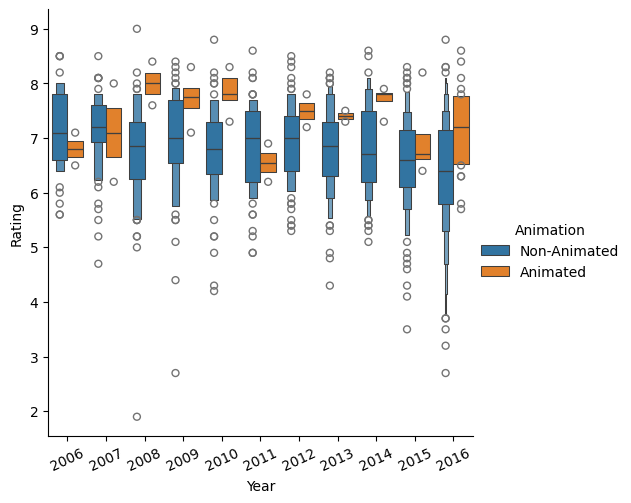

In [6]:
viz = sns.catplot(data=df, x="Year", y="Rating", hue="Animation", kind="boxen");
viz.set_xticklabels(rotation=25);

**ANSWER**: Yes, there does seem to be a noticeable difference in ratings between Animated and Non-Animated movies. After 2008, Animated movies generally have higher ratings than Non-Animated movies, with the only exception being 2011. This trend is clear in the boxen plot, where we can see that Animated movies maintain a higher and more consistent rating, while Non-Animated movies show more variation and lower average ratings. The difference is actually pretty significant, which suggests that Animated movies might be more favorably rated overall in recent years.

Although we broke out the individual genres, the unique combination of genres make also be an important indicator of Ratings. Let's compare **four combinations** in particular:

1. Action,Adventure,Sci-Fi
2. Drama
3. Comedy,Romance
4. Animation,Adventure,Comedy

**Use the following code** to split the categories into four groups and create a **bar plot** to view these four.

**ANSWER: Interpret the results meaningfully, explaining that you understand the graph**.

C:\Users\Kotori\AppData\Local\Temp\ipykernel_2392\44704730.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(rotation=10, labels=['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy'])


[Text(0, 0, 'Action,Adventure,Sci-Fi'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Comedy,Romance'),
 Text(3, 0, 'Animation,Adventure,Comedy')]

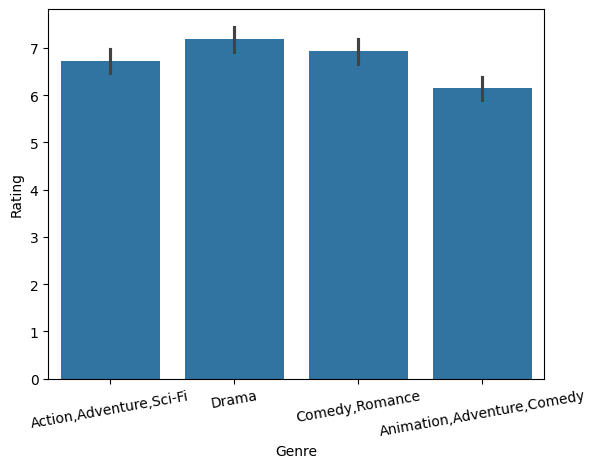

In [7]:
df_reduced = df[df['Genre'].isin(['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy'])]

viz = sns.barplot(data=df_reduced, x='Genre', y='Rating')
viz.set_xticklabels(rotation=10, labels=['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy'])

Next, calculate each of the t-test comparisons for every **pairwise comparison and adjust the p-values using the Tukey HSD method**. Print out the results.

**ANSWER: What do the results tell you as the analyst about the ratings and genre? How can you tell? Make sure to reference specific pieces of the output**.

**ANSWER**: The bar plot shows the average ratings for the four genre combinations. Comedy, Romance has the highest rating, which suggests that these films are well-received by audiences. Action, Adventure, Sci-Fi has a noticeably lower rating, indicating that this genre may not resonate as much with viewers. Drama has a rating that falls in between, while Animation, Adventure, Comedy is also lower than Comedy, Romance but higher than Action, Adventure, Sci-Fi. Overall, this graph highlights how genre combinations can influence movie ratings.

In [8]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test for pairwise comparisons
tukey = pairwise_tukeyhsd(endog=df_reduced['Rating'], groups=df_reduced['Genre'], alpha=0.05)
print(tukey)


                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------
   Action,Adventure,Sci-Fi Animation,Adventure,Comedy    0.476 0.1062 -0.0653  1.0173  False
   Action,Adventure,Sci-Fi             Comedy,Romance  -0.5778 0.0345 -1.1259 -0.0298   True
   Action,Adventure,Sci-Fi                      Drama   0.2114 0.6281 -0.2466  0.6694  False
Animation,Adventure,Comedy             Comedy,Romance  -1.0538 0.0001 -1.6766 -0.4311   True
Animation,Adventure,Comedy                      Drama  -0.2646 0.5892 -0.8098  0.2807  False
            Comedy,Romance                      Drama   0.7893 0.0016  0.2374  1.3412   True
--------------------------------------------------------------------------------------------


**ANSWER**: The Tukey HSD results show some interesting differences in ratings between the genre combinations. First, Action, Adventure, Sci-Fi had significantly lower ratings compared to Comedy, Romance, with a mean difference of about -0.58, indicating that action-adventure films aren't rated as highly. 

Also, Animation, Adventure, Comedy scored significantly lower than Comedy, Romance, with a difference of -1.05. On the other hand, the differences between Drama and the other genres weren’t significant, which suggests dramas are rated consistently. Overall, Comedy, Romance seems to perform the best in ratings, while Action, Adventure, Sci-Fi is rated lower, highlighting how different genres can impact viewer reception.

Finally, calculate these t-tests again while making a **Bonferroni adjustment**. Print out the results including the names of the Genre combinations (e.g. 'Animation,Adventure,Comedy - Comedy,Romance'), the t-test, and the p-value of each combination that is below the new p-value threshold. Also, print the threshold. **HINT: Use the code from class and simply change values. BE CAREFUL OF DIFFERENT DATAFRAME NAMES**.

**ANSWER: How do you interpret these results compared to the Tukey results? What's the difference in the analysis?**

In [9]:
from statsmodels.stats.multitest import multipletests
import itertools
import scipy.stats as stats

# Define the genre combinations
genre_combinations = ['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy']

# Create a list to store results
results = []

# Perform pairwise t-tests
for combo1, combo2 in itertools.combinations(genre_combinations, 2):
    group1 = df_reduced[df_reduced['Genre'] == combo1]['Rating']
    group2 = df_reduced[df_reduced['Genre'] == combo2]['Rating']
    
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    
    # Append results
    results.append({
        'comparison': f"{combo1} - {combo2}",
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Apply Bonferroni correction
_, corrected_pvals, _, _ = multipletests(results_df['p-value'], alpha=0.05, method='bonferroni')

# Add corrected p-values to the results DataFrame
results_df['corrected p-value'] = corrected_pvals

# Define the new threshold
threshold = 0.05 / len(results_df)  # Bonferroni threshold

# Filter results for significant comparisons
significant_results = results_df[results_df['corrected p-value'] < threshold]

print("New threshold for significance:", threshold)
print(significant_results)


New threshold for significance: 0.008333333333333333
                                    comparison  t-statistic   p-value  \
3                       Drama - Comedy,Romance     4.172551  0.000089   
5  Comedy,Romance - Animation,Adventure,Comedy    -5.525278  0.000001   

   corrected p-value  
3           0.000533  
5           0.000007  


Run Tukey and Bonferroni comparisons with Year and Rating. **ANSWER: Is there any advantage or disadvantage to either analysis with this many categories? Are there any differences in results? How do you interpret the results?**